# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Oren

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# define our train data and train target
X_train = df_train['story'].copy()
y_train = df_train['gender'].copy()

X_train.head(5)

0    כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...
1    לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2    מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3    כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...
4    ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...
Name: story, dtype: object

let's run the CountVectorizer on our corpus, and create the X_test dataframe (with a reduces amount of features)

In [12]:
vect = CountVectorizer(max_features=10000)
train_vec = vect.fit_transform(X_train)

In [13]:
features = vect.get_feature_names_out()
X_train = pd.DataFrame(train_vec.toarray(), columns = features)

Now let's normalize our X_train dataset

In [14]:
X_train = preprocessing.normalize(X_train, norm='l1') # 'Manhattan Distance' normalization

Now let's run a ML algorithm on that data, so we can predict future stories.

In [15]:
y_train = df_train["gender"].copy()
y_train.replace(('m', 'f'), (1, 0), inplace=True)

# fit and predict using NaiveBayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

GaussianNB()

Let's evaluate our prediction on the train set:

In [16]:
print (f1_score(y_train, y_pred, average='macro'))

0.9963356237712417


We recieved an amazing score of 0.9963!!

Now let's run the prediction on our test-dataset:

In [17]:
# first we define our X_test dataframe
X_test = df_test['story'].copy()

# build the vector
test_vec = vect.transform(df_test['story'])

# craft the X_test dataframe
features = vect.get_feature_names_out()
X_test = pd.DataFrame(test_vec.toarray(), columns = features)

# 'Manhattan Distance' normalization
X_test = preprocessing.normalize(X_test, norm='l1')

# predict the unseen data
y_pred = clf.predict(X_test)

# create the predicted dataframe
df_predicted = pd.DataFrame({'test_example_id' : df_test['test_example_id'], 'category_predicted' : ['m' if val == 1 else 'f' for val in y_pred]})
df_predicted.iloc[:,[1]].value_counts()
len(y_pred)

category_predicted
m                     316
f                       7
Name: count, dtype: int64

323

And a little graph to demonstrate the result of our prediction:

([<matplotlib.patches.Wedge at 0x172bfbb26d0>,
 [Text(-1.0974514925864134, 0.07483462714448004, 'Male'),
  Text(1.1972198086611165, -0.08163779608391974, 'Female')],
 [Text(-0.5986099050471345, 0.04081888753335275, '97.8%'),
  Text(0.6983782217189847, -0.04762204771561984, '2.2%')])

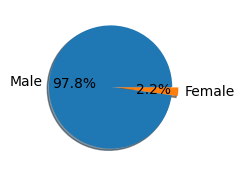

In [18]:
fig = plt.figure(figsize =(2, 2))
plt.pie(df_predicted.iloc[:,[1]].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=0)
plt.show()

### Now, Let's explore further options, with different algorithms and demonstrate the usage of <ins>cross validation</ins>:

##### Predicting using LogisticRegression:

In [19]:
p = Pipeline([
    ('vect', TfidfVectorizer()),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', linear_model.LogisticRegression())
])

params = {
    'vect__max_df': [0.9, 0.92],
    'clf__penalty': ['l1', 'l2', 'elasticnet', None],
    'clf__C': [7750, 7900],
    'clf__solver': ['lbfgs', 'liblinear'],
    'clf__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}],
    'clf__random_state': [28, 30, 32],
    'clf__max_iter': [10, 12, 14]
}

g = GridSearchCV(p, param_grid=params, scoring='f1_macro', cv=15, n_jobs=-1)

g.fit(df_train['story'].copy(), y_train)
g.best_estimator_
print('The best score is:', g.best_score_)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [7750, 7900],
                         'clf__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}],
                         'clf__max_iter': [10, 12, 14],
                         'clf__penalty': ['l1', 'l2', 'elasticnet', None],
                         'clf__random_state': [28, 30, 32],
                         'clf__solver': ['lbfgs', 'liblinear'],
                         'vect__max_df': [0.9, 0.92]},
             scoring='f1_macro')

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.92)),
                ('norm', Normalizer(norm='l1')),
                ('clf',
                 LogisticRegression(C=7900, class_weight={0: 1, 1: 1},
                                    max_iter=14, penalty='l1', random_state=32,
                                    solver='liblinear'))])

The best score is: 0.7131474969070319


##### Predicting using Perceptron:

In [20]:
p = Pipeline([
    ('vect', TfidfVectorizer()),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', Perceptron(tol=1e-6, random_state=42, alpha=0.00001, max_iter=10))
])

params = {
    'vect__max_df':[0.2, 0.3, 0.4],
    'vect__ngram_range':[(1,1), (1,2), (2,2), (3,3)],
    'vect__max_features':[100, 50000, 200000]
}

g = GridSearchCV(p, param_grid=params, scoring='f1_macro', cv=15, n_jobs=-1)

g.fit(df_train['story'].copy(), y_train)
g.best_estimator_
print('The best score is:', g.best_score_)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('clf',
                                        Perceptron(alpha=1e-05, max_iter=10,
                                                   random_state=42,
                                                   tol=1e-06))]),
             n_jobs=-1,
             param_grid={'vect__max_df': [0.2, 0.3, 0.4],
                         'vect__max_features': [100, 50000, 200000],
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2), (3, 3)]},
             scoring='f1_macro')

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.4, max_features=50000,
                                 ngram_range=(1, 2))),
                ('norm', Normalizer(norm='l1')),
                ('clf',
                 Perceptron(alpha=1e-05, max_iter=10, random_state=42,
                            tol=1e-06))])

The best score is: 0.6731047793088132


##### Predicting using SGDClassifier:

In [21]:
p = Pipeline([
    ('vect', TfidfVectorizer()),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-6, random_state=42, max_iter=5, tol=None))
])

params = {
    'vect__max_df':[0.2, 0.3, 0.4],
    'vect__ngram_range':[(1,1), (1,2), (2,2), (3,3)],
    'vect__max_features':[100, 50000, 200000]
}

g = GridSearchCV(p, param_grid=params, scoring='f1_macro', cv=15, n_jobs=-1)

g.fit(df_train['story'].copy(), y_train)
g.best_estimator_
print('The best score is:', g.best_score_)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('clf',
                                        SGDClassifier(alpha=1e-06, max_iter=5,
                                                      random_state=42,
                                                      tol=None))]),
             n_jobs=-1,
             param_grid={'vect__max_df': [0.2, 0.3, 0.4],
                         'vect__max_features': [100, 50000, 200000],
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2), (3, 3)]},
             scoring='f1_macro')

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.2, max_features=50000,
                                 ngram_range=(3, 3))),
                ('norm', Normalizer(norm='l1')),
                ('clf',
                 SGDClassifier(alpha=1e-06, max_iter=5, random_state=42,
                               tol=None))])

The best score is: 0.60719399588745


##### Predicting using  LinearSVC:

In [22]:
p = Pipeline([
    ('vect', TfidfVectorizer()),
    ('norm', preprocessing.Normalizer(norm='l1')),
    ('clf', LinearSVC())
])

params = {
    'vect__max_df':[0.2, 0.3, 0.4],
    'vect__ngram_range':[(1,1), (1,2), (2,2), (3,3)],
    'vect__max_features':[100, 50000, 200000]
}

g = GridSearchCV(p, param_grid=params, scoring='f1_macro', cv=15, n_jobs=-1)

g.fit(df_train['story'].copy(), y_train)
g.best_estimator_
print('The best score is:', g.best_score_)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('clf', LinearSVC())]),
             n_jobs=-1,
             param_grid={'vect__max_df': [0.2, 0.3, 0.4],
                         'vect__max_features': [100, 50000, 200000],
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2), (3, 3)]},
             scoring='f1_macro')

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.2, max_features=100,
                                 ngram_range=(3, 3))),
                ('norm', Normalizer(norm='l1')), ('clf', LinearSVC())])

The best score is: 0.4799129763264614


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [23]:
df_predicted.to_csv('classification_results.csv',index=False)